In [1]:
import pandas as pd

In [2]:
# Read file data to dataframe, explicitly setting S/N columns to string type because Pandas complains 
# about mixed types in the Paired Processor S/N column
data = pd.read_csv('Exercise_Input_20220502_Processor.csv',
                       dtype = {'Processor S/N': str, 'Paired Processor S/N': str},
                       parse_dates = ['Cloud Uploaded Timestamp From Site'])

In [3]:
# project out the columns needed
data = data[['Processor S/N', 'Cloud Uploaded Timestamp From Site']]

In [4]:
# set timeindex
data.index = data['Cloud Uploaded Timestamp From Site']

In [5]:
# filter data by time range
mask = (data['Cloud Uploaded Timestamp From Site'] >= '2022-1-1') & \
       (data['Cloud Uploaded Timestamp From Site'] <= '2022-5-31')
data_filtered = data[mask]

In [7]:
# group by month
monthly_uploads = data_filtered.groupby(pd.Grouper(freq='M')).size().reset_index(name='Counts')

<AxesSubplot:title={'center':'Uploads by Month'}, xlabel='Cloud Uploaded Timestamp From Site'>

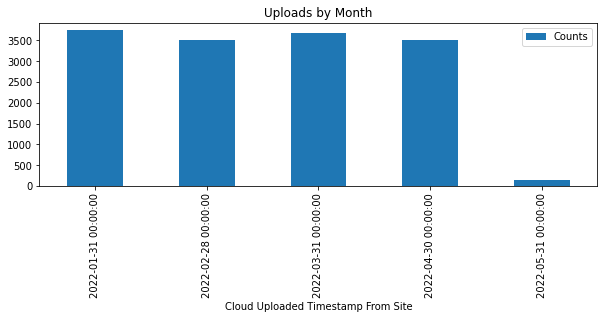

In [8]:
# visualization
monthly_uploads.plot.bar(x='Cloud Uploaded Timestamp From Site', y='Counts', figsize=(10,3), title='Uploads by Month')